# Using several inputs for the Score 


To what extent the SS reflects the nature of different metabolic pathways

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib
import scipy.cluster.hierarchy as sch

In [9]:
#Read table input (scores computed using different input pathways )
meta_df = pd.read_table('meta_scores_pathways.tab', index_col=0)
#Deleting human associated environments 
mask1 = meta_df['env_package'] == 'human-gut'
mask2 = meta_df['env_package'] == 'human-associated'

# join mask 
mask = mask1 | mask2
# invertir (esta operación solo funciona con arreglos binarios)
mask = ~mask

meta_df = meta_df[mask]
#meta_df.count()

print(meta_df.columns)
print(meta_df.index)


Index(['MSL', 'Sscore_2017', 'Sscore_2014', '30', '60', '100', '150', '200',
       '250', '300', 'biome', 'feature', 'material', 'env_package', 'location',
       'latitude', 'longitude', 'depth', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'Score_5', 'Score_6', 'Score_7', 'Score_8', 'Score_9',
       'Score_10', 'Score_11', 'Score_12', 'Score_13', 'Score_14', 'Score_15',
       'Score_16', 'Score_17', 'Score_18', 'Score_19', 'Score_20', 'Score_21',
       'Score_22', 'Score_23', 'Score_24', 'Score_25', 'Score_26', 'Score_27',
       'Score_28', 'Score_29'],
      dtype='object')
Float64Index([4489656.3, 4489655.3, 4489654.3, 4489649.3, 4489648.3, 4489645.3,
              4489643.3, 4539591.3, 4539590.3, 4539589.3,
              ...
              4441604.3, 4441602.3, 4441590.3, 4441136.3, 4441131.3, 4441127.3,
              4493727.3, 4514452.3, 4478350.3, 4474000.3],
             dtype='float64', name='ID ', length=923)


In [12]:
#Check the values of the dataframe
#eturns a boolean Series indicating which columns have nonzero entries. 
#(The any operation aggregates values along the 0-axis -- i.e. along the rows -- 
#into a single boolean value. Hence the result is one boolean value for each column.)

(meta_df != 0).any(axis=0)
#df.loc can be used to select those columns:
new_metadf=meta_df.loc[:, (meta_df != 0).any(axis=0)]
#New phyle with no human associated data
new_metadf.to_csv('meta_scores_no_human.csv', sep='\t')


# Values of SS higher that 95 percentile distribution

In [14]:
print('Path1\t', np.percentile(new_metadf.Score_1, 95))
print('Path2\t', np.percentile(new_metadf.Score_2, 95))
print('Path4\t', np.percentile(new_metadf.Score_4, 95))
print('Path5\t', np.percentile(new_metadf.Score_5, 95))
print('Path6\t', np.percentile(new_metadf.Score_6, 95))
print('Path7\t', np.percentile(new_metadf.Score_7, 95))
print('Path10\t',  np.percentile(new_metadf.Score_10, 95))
print('Path11\t',  np.percentile(new_metadf.Score_11, 95))
print('Path13\t', np.percentile(new_metadf.Score_13, 95))
print('Path15\t', np.percentile(new_metadf.Score_15, 95))
print('Path16\t', np.percentile(new_metadf.Score_16, 95))
print('Path17\t', np.percentile(new_metadf.Score_17, 95))
print('Path18\t', np.percentile(new_metadf.Score_18, 95))
print('Path19\t', np.percentile(new_metadf.Score_19, 95))
print('Path20\t', np.percentile(new_metadf.Score_20, 95))
print('Path21\t', np.percentile(new_metadf.Score_21, 95))
print('Path22\t', np.percentile(new_metadf.Score_22, 95))
print('Path23\t', np.percentile(new_metadf.Score_23, 95))
print('Path28\t', np.percentile(new_metadf.Score_28, 95))
print('Path29\t', np.percentile(new_metadf.Score_29, 95))
print('Path_SS_2017\t', np.percentile(new_metadf.Sscore_2017, 95))

Path1	 1.296
Path2	 0.221
Path4	 4.039
Path5	 3.687
Path6	 4.923
Path7	 2.294
Path10	 0.41
Path11	 3.033
Path13	 0.01
Path15	 0.314
Path16	 1.633
Path17	 0.058
Path18	 0.058
Path19	 0.041
Path20	 0.439
Path21	 0.161
Path22	 0.035
Path23	 0.04
Path28	 0.106
Path29	 5.321
Path_SS_2017	 15.146


In [13]:
new_metadf.columns

Index(['MSL', 'Sscore_2017', 'Sscore_2014', '30', '60', '100', '150', '200',
       '250', '300', 'biome', 'feature', 'material', 'env_package', 'location',
       'latitude', 'longitude', 'depth', 'Score_1', 'Score_2', 'Score_4',
       'Score_5', 'Score_6', 'Score_7', 'Score_10', 'Score_11', 'Score_13',
       'Score_15', 'Score_16', 'Score_17', 'Score_18', 'Score_19', 'Score_20',
       'Score_21', 'Score_22', 'Score_23', 'Score_28', 'Score_29'],
      dtype='object')

# Pairwaise-linnear regresion

In [15]:
columns = ['Sscore_2017','Sscore_2014','Score_4', 'Score_5', 'Score_6',
       'Score_7', 'Score_10', 'Score_11', 'Score_13', 'Score_16', 'Score_17',
       'Score_18', 'Score_19', 'Score_20', 'Score_22', 'Score_23', 'Score_28',
       'Score_29']

indices = np.tril_indices(len(columns), k=-1)

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    reg = stats.linregress(new_metadf[col1], new_metadf[col2])
    print("{:<15}vs {:<15}r-value = {:.4}".format(col1, col2, reg.rvalue**2))
   

Sscore_2014    vs Sscore_2017    r-value = 0.982
Score_4        vs Sscore_2017    r-value = 0.8781
Score_4        vs Sscore_2014    r-value = 0.8751
Score_5        vs Sscore_2017    r-value = 0.8112
Score_5        vs Sscore_2014    r-value = 0.7815
Score_5        vs Score_4        r-value = 0.6496
Score_6        vs Sscore_2017    r-value = 0.8831
Score_6        vs Sscore_2014    r-value = 0.8733
Score_6        vs Score_4        r-value = 0.9378
Score_6        vs Score_5        r-value = 0.6382
Score_7        vs Sscore_2017    r-value = 0.7702
Score_7        vs Sscore_2014    r-value = 0.7656
Score_7        vs Score_4        r-value = 0.8405
Score_7        vs Score_5        r-value = 0.5037
Score_7        vs Score_6        r-value = 0.7821
Score_10       vs Sscore_2017    r-value = 0.1756
Score_10       vs Sscore_2014    r-value = 0.2319
Score_10       vs Score_4        r-value = 0.2713
Score_10       vs Score_5        r-value = 0.09234
Score_10       vs Score_6        r-value = 0.2434


In [20]:
print(new_metadf.columns)
print(new_metadf.index)


Index(['Sscore_2017', 'Sscore_2014', 'biome', 'feature', 'material',
       'env_package', 'location', 'latitude', 'longitude', 'depth', 'Score_1',
       'Score_2', 'Score_4', 'Score_5', 'Score_6', 'Score_7', 'Score_10',
       'Score_11', 'Score_13', 'Score_15', 'Score_16', 'Score_17', 'Score_18',
       'Score_19', 'Score_20', 'Score_21', 'Score_22', 'Score_23', 'Score_28',
       'Score_29'],
      dtype='object')
Float64Index([4489656.3, 4489655.3, 4489654.3, 4489649.3, 4489648.3, 4489645.3,
              4489643.3, 4539591.3, 4539590.3, 4539589.3,
              ...
              4441604.3, 4441602.3, 4441590.3, 4441136.3, 4441131.3, 4441127.3,
              4493727.3, 4514452.3, 4478350.3, 4474000.3],
             dtype='float64', name='ID ', length=923)


# Correlation

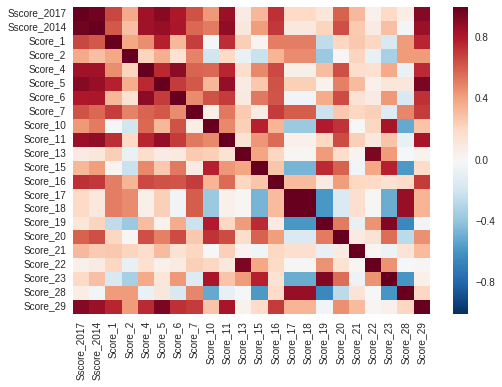

In [26]:
corr_paths=new_metadf.corr(method='spearman')
sns.heatmap(corr_paths, annot=False)

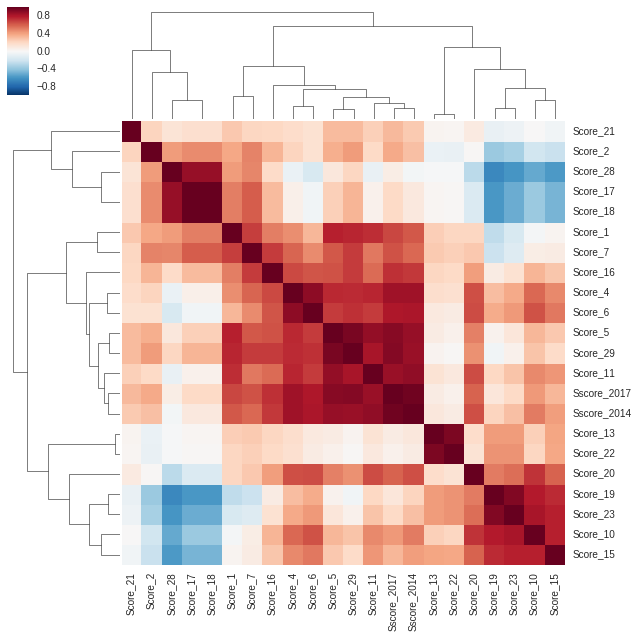

In [27]:
#Example 2 
axs = sns.clustermap(corr_paths)
sand = plt.setp(axs.ax_heatmap.get_yticklabels(), rotation=0)


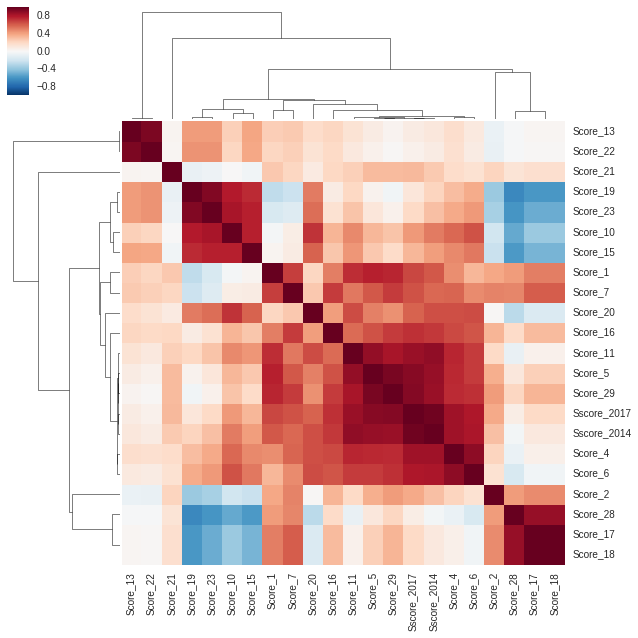

In [28]:
#Example 3 
#Valid methods when the raw observations are omitted are 'single', 'complete', 'weighted', and 'average'
axs = sns.clustermap(corr_paths, method="single", metric="cosine")
sand = plt.setp(axs.ax_heatmap.get_yticklabels(), rotation=0)


# Heatmap

In [29]:
#Eliminate columns to plot the histogram
del new_metadf ['Sscore_2014']
del new_metadf ['biome'] 
del new_metadf ['material']
del new_metadf ['feature']
del new_metadf ['env_package']
del new_metadf ['location']
del new_metadf ['latitude']
del new_metadf ['longitude']
del new_metadf ['depth']

# Final figure 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19c1706978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f19c139c2e8>]], dtype=object)

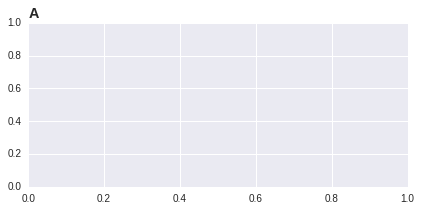

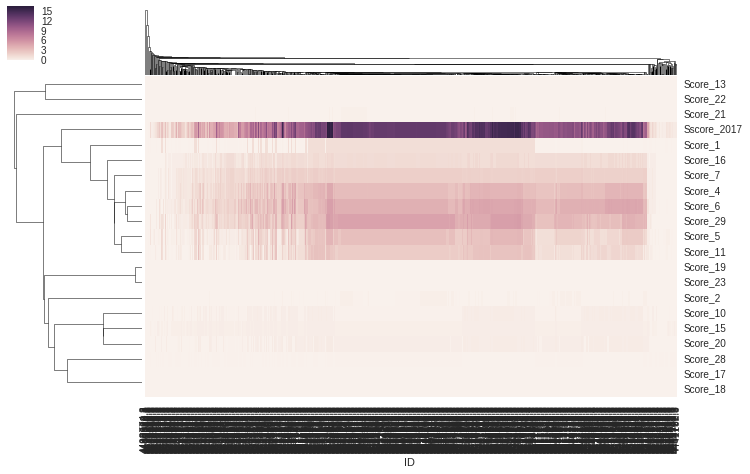

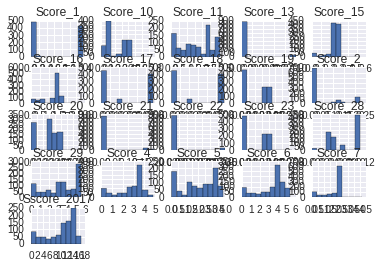

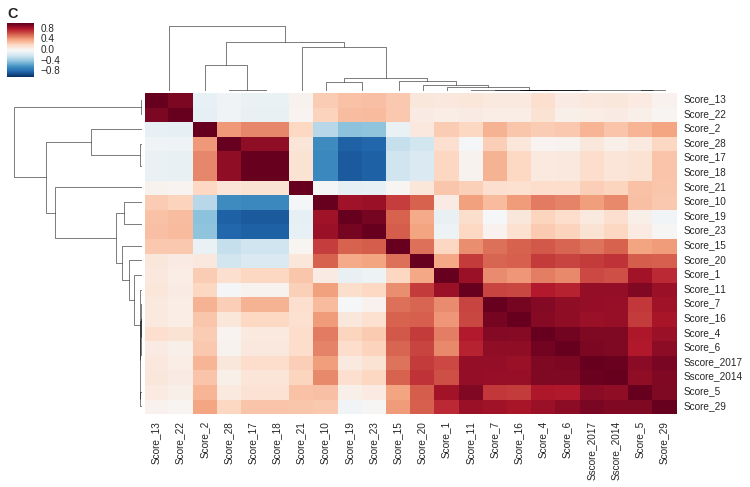

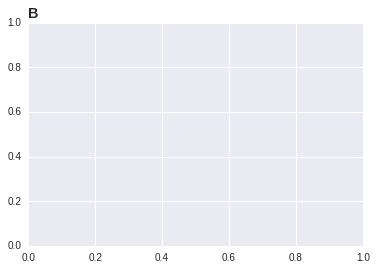

In [39]:
X = 17/2.5
Y = 25/2.5
fig = plt.figure(figsize=(X, Y))


# HEATMAP 
plt.subplot(311)
plt.title('A', fontweight='bold', fontsize='x-large', loc='left')
axs = sns.clustermap(trans[, method="single", metric="braycurtis", row_cluster=True,
                     fmt='', figsize=(12,7),linewidths=0  )
sand = plt.setp(axs.ax_heatmap.get_yticklabels(), rotation=0 )

#CORRELATION DATA 
plt.figure(321)
plt.title('B', fontweight='bold', fontsize='x-large', loc='left')
axs = sns.clustermap(corr_paths, method="single", metric="cosine",figsize=(12,7))
sand = plt.setp(axs.ax_heatmap.get_yticklabels(), rotation=0)

#HISTOGRAMS

plt.figure(322)
plt.title('C', fontweight='bold', fontsize='x-large', loc='left')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19c1a8fc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f19c23ebd30>]], dtype=object)

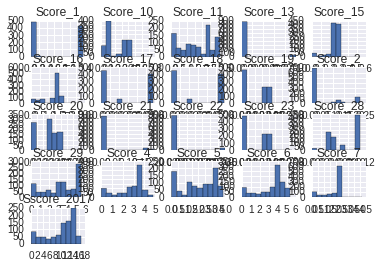

In [40]:

new_metadf.hist()

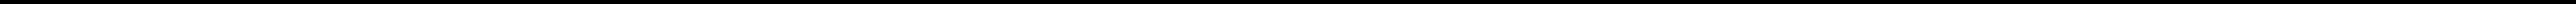

In [45]:
g= sns.FacetGrid(meta_df, col="Sscore_2017", hue="env_package")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f197beff470>]], dtype=object)

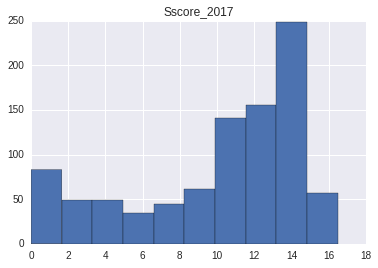

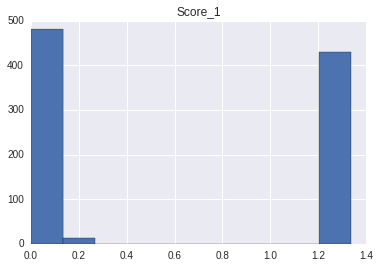

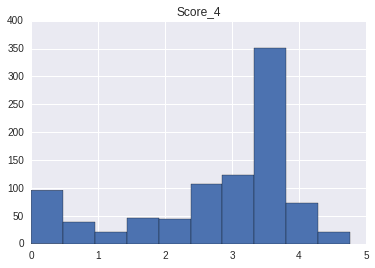

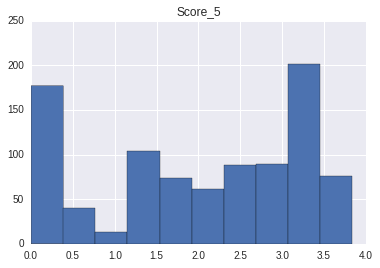

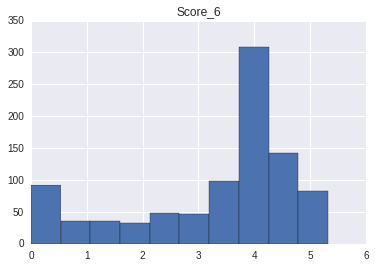

In [62]:
new_metadf.hist(['Sscore_2017'],stacked=True)
new_metadf.hist(['Score_1'],stacked=True)
new_metadf.hist(['Score_4'],stacked=True)
new_metadf.hist(['Score_5'],stacked=True)
new_metadf.hist(['Score_6'],stacked=True)

In [154]:
new_metadf.columns


Index(['Sscore_2017', 'Score_1', 'Score_2', 'Score_4', 'Score_5', 'Score_6',
       'Score_7', 'Score_10', 'Score_11', 'Score_13', 'Score_15', 'Score_16',
       'Score_17', 'Score_18', 'Score_19', 'Score_20', 'Score_21', 'Score_22',
       'Score_23', 'Score_28', 'Score_29'],
      dtype='object')

In [65]:
columns = ['Sscore_2017', 'Score_1','Score_2', 'Score_4', 'Score_5', 'Score_6', 'Score_7', 'Score_10',
       'Score_11', 'Score_13', 'Score_15', 'Score_16', 'Score_17', 'Score_18',
       'Score_19', 'Score_20', 'Score_21', 'Score_22', 'Score_23', 'Score_28',
       'Score_29']

percentiles = []

for col in columns:
    data = new_metadf[col]
    perc = np.percentile(data, 95)
    percentiles.append(perc)

listas_meta = []

for i, col in enumerate(columns):
    perc = percentiles[i]
    mask = new_metadf[col] >= perc
    metas = meta_df.index[mask]
    listas_meta.append(metas)

In [87]:
# número de metagenomas en percentil 95
#Habra forma de plotear estos ambientes usando esta funcion?

#ax = sns.countplot(x="class", hue="who", data=titanic)


for i, col in enumerate(columns):
    #print(col, ' n95 = {}'.format(len(listas_meta[i*923/100])))
    print (col, 'n95 ={}'.format(len(listas_meta[i])))
    

Sscore_2017 n95 =48
Score_1 n95 =262
Score_2 n95 =118
Score_4 n95 =50
Score_5 n95 =76
Score_6 n95 =68
Score_7 n95 =339
Score_10 n95 =147
Score_11 n95 =58
Score_13 n95 =52
Score_15 n95 =55
Score_16 n95 =51
Score_17 n95 =406
Score_18 n95 =406
Score_19 n95 =66
Score_20 n95 =179
Score_21 n95 =70
Score_22 n95 =58
Score_23 n95 =62
Score_28 n95 =439
Score_29 n95 =60


In [67]:
# tamaño del conjunto interseccion ESTO NO ME ACUERDO PARA QUE ERA! :( 

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    set1 = set(listas_meta[i])
    set2 = set(listas_meta[j])
    union_l = len(set1.intersection(set2))
    print("{:<15}vs {:<15}tamaño de la interseccion = {}".format(col1, col2, union_l))

Score_1        vs Sscore_2017    tamaño de la interseccion = 10
Score_2        vs Sscore_2017    tamaño de la interseccion = 0
Score_2        vs Score_1        tamaño de la interseccion = 76
Score_4        vs Sscore_2017    tamaño de la interseccion = 17
Score_4        vs Score_1        tamaño de la interseccion = 14
Score_4        vs Score_2        tamaño de la interseccion = 0
Score_5        vs Sscore_2017    tamaño de la interseccion = 47
Score_5        vs Score_1        tamaño de la interseccion = 11
Score_5        vs Score_2        tamaño de la interseccion = 0
Score_5        vs Score_4        tamaño de la interseccion = 17
Score_6        vs Sscore_2017    tamaño de la interseccion = 20
Score_6        vs Score_1        tamaño de la interseccion = 12
Score_6        vs Score_2        tamaño de la interseccion = 0
Score_6        vs Score_4        tamaño de la interseccion = 40
Score_6        vs Score_5        tamaño de la interseccion = 25
Score_7        vs Sscore_2017    tamaño de l

In [68]:
temp = {columns[i]: pd.Series(listas_meta[i].get_values())for i in range(len(columns))}
metas95 = pd.DataFrame(temp)
metas95.to_csv('meta_perc95_allscores.tab', sep='\t')


In [72]:
x = meta_df.loc[listas_meta[0]]['feature']

In [70]:
np.unique(x, return_counts=True)


(array(['Glacial feature', 'alkaline salt lake', 'biofilm', 'coast',
        'fossil', 'hydrographic feature', 'intertidal zone', 'lake',
        'marine benthic feature', 'marine habitat',
        'marine oligotrophic desert', 'microbial feature',
        'plant-associated habitat', 'prairie', 'soil', 'terrestrial habitat'], dtype=object),
 array([1, 9, 1, 1, 1, 3, 8, 1, 4, 5, 4, 1, 1, 3, 3, 2]))

In [75]:
# ESTO TAMPOCO ME ACURDO PARA QUE ERA!! 


for i, col in enumerate(columns):
    data = listas_meta[i]
    subdf = meta_df.loc[data]['feature']
    counts = np.unique(subdf, return_counts=True)
    dica = {'feature': counts[0], 'count': counts[1]}
    newdf = pd.DataFrame(dica)
    col = col.replace(' ', '_')
    newdf.to_csv('{}-metas_perc95.tab'.format(col), sep='\t')

In [207]:
meta_df

,MSL,Sscore_2017,Sscore_2014,30,60,100,150,200,250,300,...,Score_20,Score_21,Score_22,Score_23,Score_24,Score_25,Score_26,Score_27,Score_28,Score_29
ID,,,,,,,,,,,,,,,,,,,,,
4489656.3,23,1.804,4.551,1.804,2.335,1.888,1.956,1.939,2.000,2.027,...,0.079,0.000,0.0,0.001,0,0,0,0,0.106,0.000
4489655.3,23,5.096,6.569,5.096,5.625,5.177,5.306,5.195,5.346,5.241,...,0.079,0.000,0.0,0.001,0,0,0,0,0.106,2.753
4489654.3,23,1.914,4.419,1.914,2.455,2.242,2.209,2.116,2.271,2.204,...,0.079,0.000,0.0,0.001,0,0,0,0,0.106,0.801
4489649.3,23,1.513,2.520,1.513,1.943,1.730,1.668,1.598,1.704,1.674,...,0.079,0.000,0.0,0.001,0,0,0,0,0.106,0.325
4489648.3,23,3.319,3.194,3.319,3.890,3.548,3.682,3.693,3.734,3.578,...,0.000,0.000,0.0,0.001,0,0,0,0,0.000,1.506
4489645.3,23,1.712,1.368,1.712,2.059,1.879,1.993,1.922,2.002,1.896,...,0.000,0.000,0.0,0.001,0,0,0,0,0.106,1.506
4489643.3,23,0.523,1.341,0.523,0.444,0.398,0.396,0.392,0.390,0.385,...,0.000,0.000,0.0,0.001,0,0,0,0,0.000,0.000
4539591.3,24,12.938,13.259,12.938,15.638,14.422,14.727,14.728,14.877,14.775,...,0.079,0.000,0.0,0.001,0,0,0,0,0.106,5.069
4539590.3,24,13.158,13.355,13.158,16.141,14.890,15.145,15.126,15.276,15.175,...,0.270,0.000,0.0,0.001,0,0,0,0,0.106,5.069


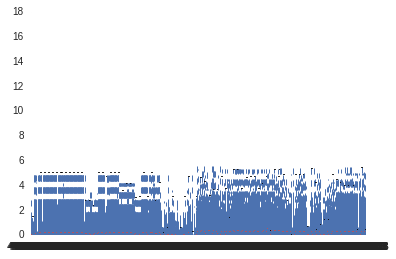

In [83]:
#new_metadf.plot.hist(stacked=True)
#estuve viendo varias formas de hacer un stacked de histograma pero ninguno como seaborn,  :(
#desesperation mil 
#new_metadf.hist((figsize = 10,10))
#plt.savefig('histograms.png', dpi=300)
new_metadf.T.boxplot()

In [ ]:
axes